# Telecom Customer Churn Prediction Model

This Logistic Regression Model shall be used to predict whether a customer using a particular telecom service shall churn or not and hence is a 'Binary Classification Problem'.

<img src="https://media.giphy.com/media/23UUncwBQRkIg/giphy.gif" width="480" height="120" align="center"/>

                                    Zoo-Zoo says Hug your customer and make him stay! ;)

### Libraries and Packages used :

In [1]:
#Importing the requisite Libraries and Packages to be used to build the model:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

### Data Consolidation : 

In [3]:
#Merging the data of multiple .csv files into a single .csv file and creating a local file of it.
input_files = ['File-churn_data.csv', 'File-customer_data.csv', 'File-internet_data.csv']
output_file = 'output.csv'
output = None
for infile in input_files:
    with open(infile, 'r') as fh:
        if output:
            for i, l in enumerate(fh.readlines()):
                output[i] = "{},{}".format(output[i].rstrip('\n'), l)
        else:
            output = fh.readlines()

with open(output_file, 'w') as fh:
    for line in output:
        fh.write(line)

### Importing the Dataset : 

In [4]:
#Importing the dataset from the new locally created merged .csv file :
df=pd.read_csv('output.csv')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID.1,...,Dependents,customerID.2,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG,...,No,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,5575-GNVDE,...,No,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK,...,No,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW,...,No,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU,...,No,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Duplicacy Elimination :

In [5]:
#Eliminating the redundant duplicate columns from the dataset :
df=df.drop(['customerID.1'],axis=1)
df=df.drop(['customerID.2'],axis=1)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Exploring allthe columns of the dataframe :
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

### Exploratory Data Analysis :

In [7]:
#Displaying the entire final Dataframe :
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


*Note: Here we can try to study and segregate our 'Attributes' and 'Labels'.

In [8]:
#Collecting the superficial knowledge of our data calculated over the values present in each column:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


*Note: The data description highlights the numeric features from our data and also allows us to study the mean values of these features.

In [9]:
#Inspecting the data for the null values or no-value column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


*Note : The data info allows us to know the number of null values in our various feature columns and also highlights the various datatypes(with their count) in our data.

<img src="https://cdn.searchenginejournal.com/wp-content/uploads/2019/01/shutterstock_1014394012-760x400.png" width="300" height="120" align="center"/>

#### *Though the above commands indicate that we do not have any null element in our dataset but these command take spaces into consideration as non-null data. Attentive exploration of data files show that there are certain elements blank as white spaces in the 'Total Charges ' column and hence they need to be removed. 

### Data Cleaning :  

In [10]:
#Converting the blank space elements in the entire dataset into 'nan(not a number)'tag : 
colms=[df.columns]
for i in colms:
    df[i]=df[i].replace(" ",np.nan)

In [11]:
#Data can also be checked whether it has a missing value or not, using the below command :
df.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

####                    Oh Snap!! The dataset had 11 null elements in the 'Total Charges' column,though the command showed none.

<img src="https://media.giphy.com/media/3oEjHXTdZtYRmhWzny/giphy.gif" width="300" height="120" align="center"/>

                                    So if possible keep a check on the dataset manually as well!

In [12]:
#Droping the rows having atleast one of the elements missing cause this might effect model prediction :
df.dropna()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


*Note: 11 rows have been completely eliminated from the dataset and the final row count is 7032.

### Data Features Dictionary :

#### Attribute/Independent Variables :

|Serial No.|Feature|Description|
|-----|-------|------|
|1.|Customer ID|The Unique ID of each customer.| 				
|2.|Gender|The gender of a person.|			
|3.|SeniorCitizen|Whether a customer can be classified as a senior citizen.|				
|4.|Partner|If a customer is married/ in a live-in relationship.|				
|5.|Dependents|If a customer has dependents (children/ retired parents).|				
|6.|Tenure|The time for which a customer has been using the service.|				
|7.|PhoneService|Whether a customer has a landline phone service along with the internet service.|				
|8.|MultipleLines|Whether a customer has multiple lines of internet connectivity.|				
|9.|InternetService|The type of internet services chosen by the customer.|				
|10.|OnlineSecurity|Specifies if a customer has online security.|				
|11.|OnlineBackup|Specifies if a customer has online backup.|				
|12.|DeviceProtection|Specifies if a customer has opted for device protection.|				
|13.|TechSupport|Whether a customer has opted for tech support of not.|				
|14.|StreamingTV|Whether a customer has an option of TV streaming.|				
|15.|StreamingMovies|Whether a customer has an option of Movie streaming.|				
|16.|Contract|The type of contract a customer has chosen.				|
|17.|PaperlessBilling|	Whether a customer has opted for paperless billing.|				
|18.|PaymentMethod|Specifies the method by which bills are paid.|				
|19.|MonthlyCharges|Specifies the money paid by a customer each month.|				
|20.|TotalCharges|The total money paid by the customer to the company.|				
				

#### Label/Dependent Variable/Target Variable :

|Serial No.|Feature|Description|
|-----|-------|------|
|1.|Churn|This is the target variable which specifies if a customer has churned or not.|

### Features Exploration :

No     5174
Yes    1869
Name: Churn, dtype: int64


Text(0, 0.5, 'Class Count')

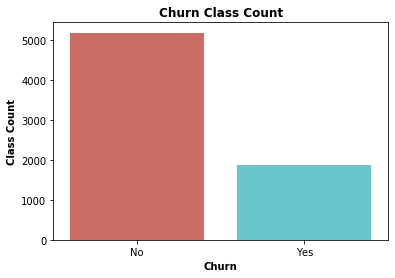

In [13]:
#Analysis of Target Variable 'Churn' :
print(df.Churn.value_counts())
plt1=sns.countplot(x='Churn',data=df,palette='hls')
plt1.set_title('Churn Class Count',weight='bold')
plt1.set_xlabel('Churn',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')

*Note : It can be clearly inferred that the Target Variable has imbalanced class distribution as positive('Yes') class is much less than the negative class 'No.' 

Text(0, 0.5, 'Class Count')

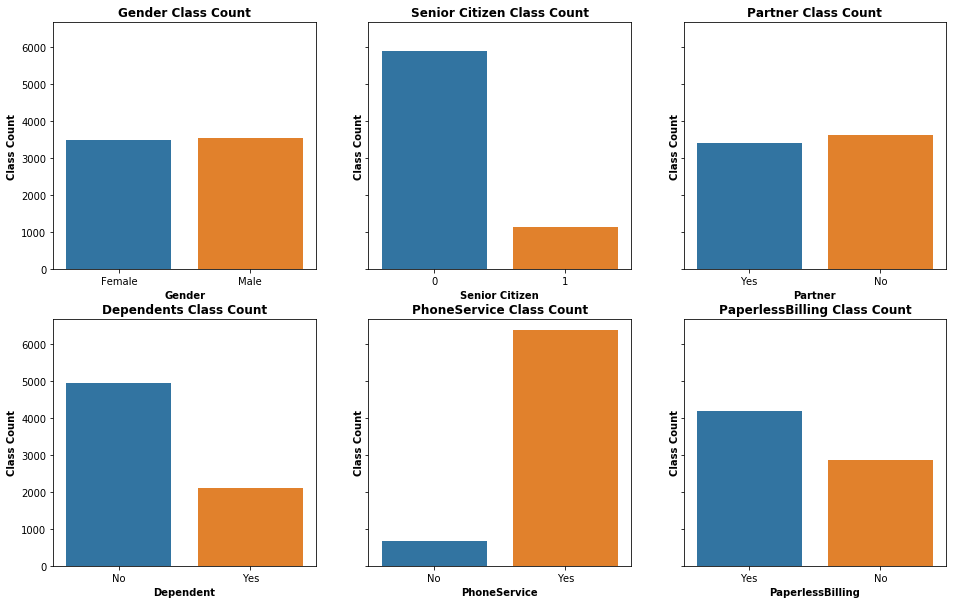

In [14]:
#Distribution of Independent Binary Features:
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharey=True)
plt1=sns.countplot("gender", data=df, ax=axes[0,0])
plt1.set_title('Gender Class Count',weight='bold')
plt1.set_xlabel('Gender',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt2=sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
plt2.set_title('Senior Citizen Class Count',weight='bold')
plt2.set_xlabel('Senior Citizen',fontweight='bold',fontsize='10')
plt2.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt3=sns.countplot("Partner", data=df, ax=axes[0,2])
plt3.set_title('Partner Class Count',weight='bold')
plt3.set_xlabel('Partner',fontweight='bold',fontsize='10')
plt3.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt4=sns.countplot("Dependents", data=df, ax=axes[1,0])
plt4.set_title('Dependents Class Count',weight='bold')
plt4.set_xlabel('Dependent',fontweight='bold',fontsize='10')
plt4.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt5=sns.countplot("PhoneService", data=df, ax=axes[1,1])
plt5.set_title('PhoneService Class Count',weight='bold')
plt5.set_xlabel('PhoneService',fontweight='bold',fontsize='10')
plt5.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt6=sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])
plt6.set_title('PaperlessBilling Class Count',weight='bold')
plt6.set_xlabel('PaperlessBilling',fontweight='bold',fontsize='10')
plt6.set_ylabel('Class Count',fontweight='bold',fontsize='10')

Text(0, 0.5, 'Class Count')

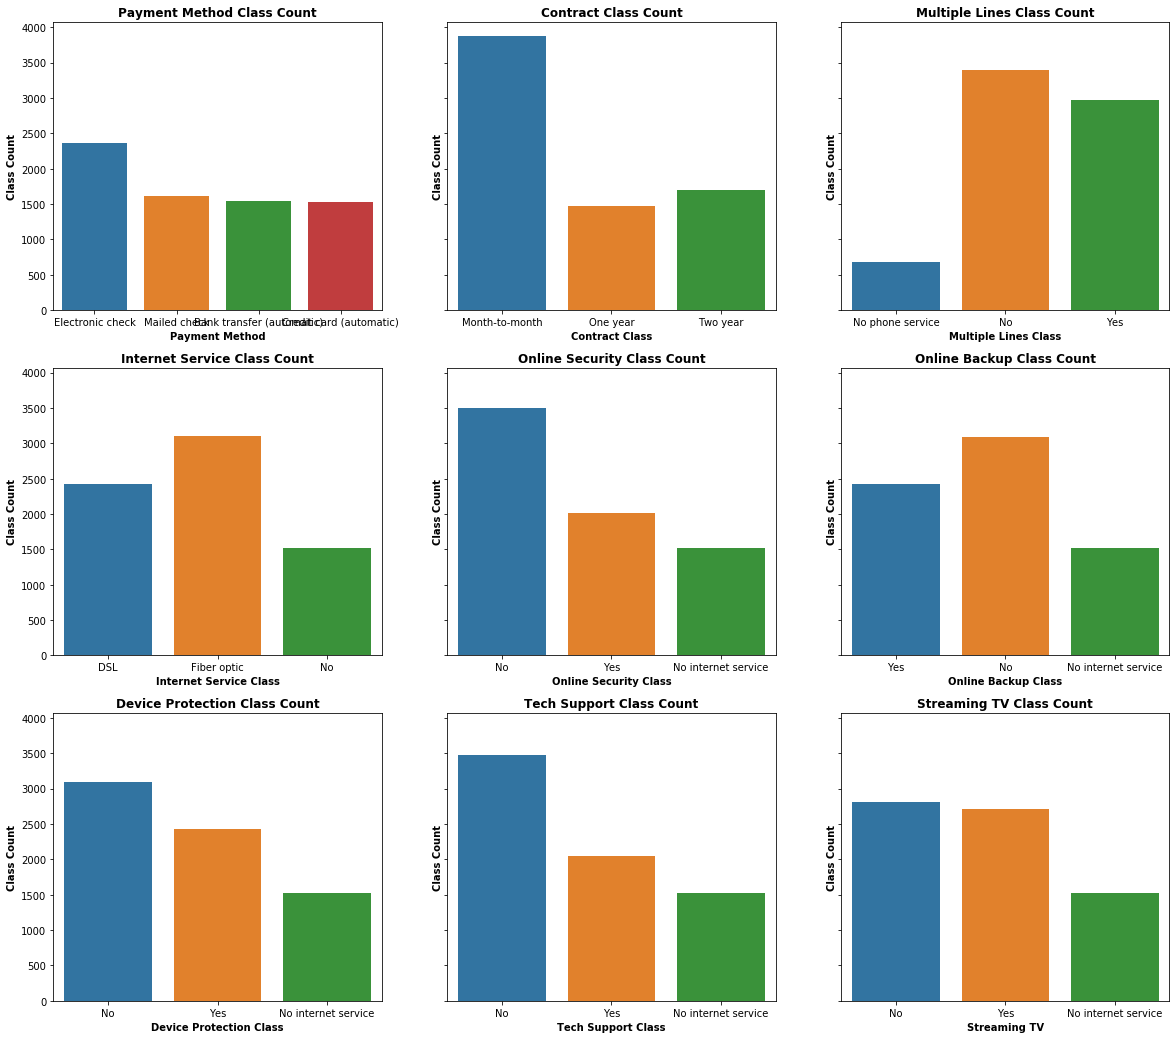

In [15]:
#Distribution of other Independent Features :
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True)
plt1=sns.countplot("PaymentMethod", data=df, ax=axes[0,0])
plt1.set_title('Payment Method Class Count',weight='bold')
plt1.set_xlabel('Payment Method',fontweight='bold',fontsize='10')
plt1.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt2=sns.countplot("Contract", data=df, ax=axes[0,1])
plt2.set_title('Contract Class Count',weight='bold')
plt2.set_xlabel('Contract Class',fontweight='bold',fontsize='10')
plt2.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt3=sns.countplot("MultipleLines", data=df, ax=axes[0,2])
plt3.set_title('Multiple Lines Class Count',weight='bold')
plt3.set_xlabel('Multiple Lines Class',fontweight='bold',fontsize='10')
plt3.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt4=sns.countplot("InternetService", data=df, ax=axes[1,0])
plt4.set_title('Internet Service Class Count',weight='bold')
plt4.set_xlabel('Internet Service Class',fontweight='bold',fontsize='10')
plt4.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt5=sns.countplot("OnlineSecurity", data=df, ax=axes[1,1])
plt5.set_title('Online Security Class Count',weight='bold')
plt5.set_xlabel('Online Security Class',fontweight='bold',fontsize='10')
plt5.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt6=sns.countplot("OnlineBackup", data=df, ax=axes[1,2])
plt6.set_title('Online Backup Class Count',weight='bold')
plt6.set_xlabel('Online Backup Class',fontweight='bold',fontsize='10')
plt6.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt7=sns.countplot("DeviceProtection", data=df, ax=axes[2,0])
plt7.set_title('Device Protection Class Count',weight='bold')
plt7.set_xlabel('Device Protection Class',fontweight='bold',fontsize='10')
plt7.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt8=sns.countplot("TechSupport", data=df, ax=axes[2,1])
plt8.set_title('Tech Support Class Count',weight='bold')
plt8.set_xlabel('Tech Support Class',fontweight='bold',fontsize='10')
plt8.set_ylabel('Class Count',fontweight='bold',fontsize='10')
plt9=sns.countplot("StreamingTV", data=df, ax=axes[2,2])
plt9.set_title('Streaming TV Class Count',weight='bold')
plt9.set_xlabel('Streaming TV',fontweight='bold',fontsize='10')
plt9.set_ylabel('Class Count',fontweight='bold',fontsize='10')

### Comparitive Analysis of relation between Categorical Features and Target Variable :

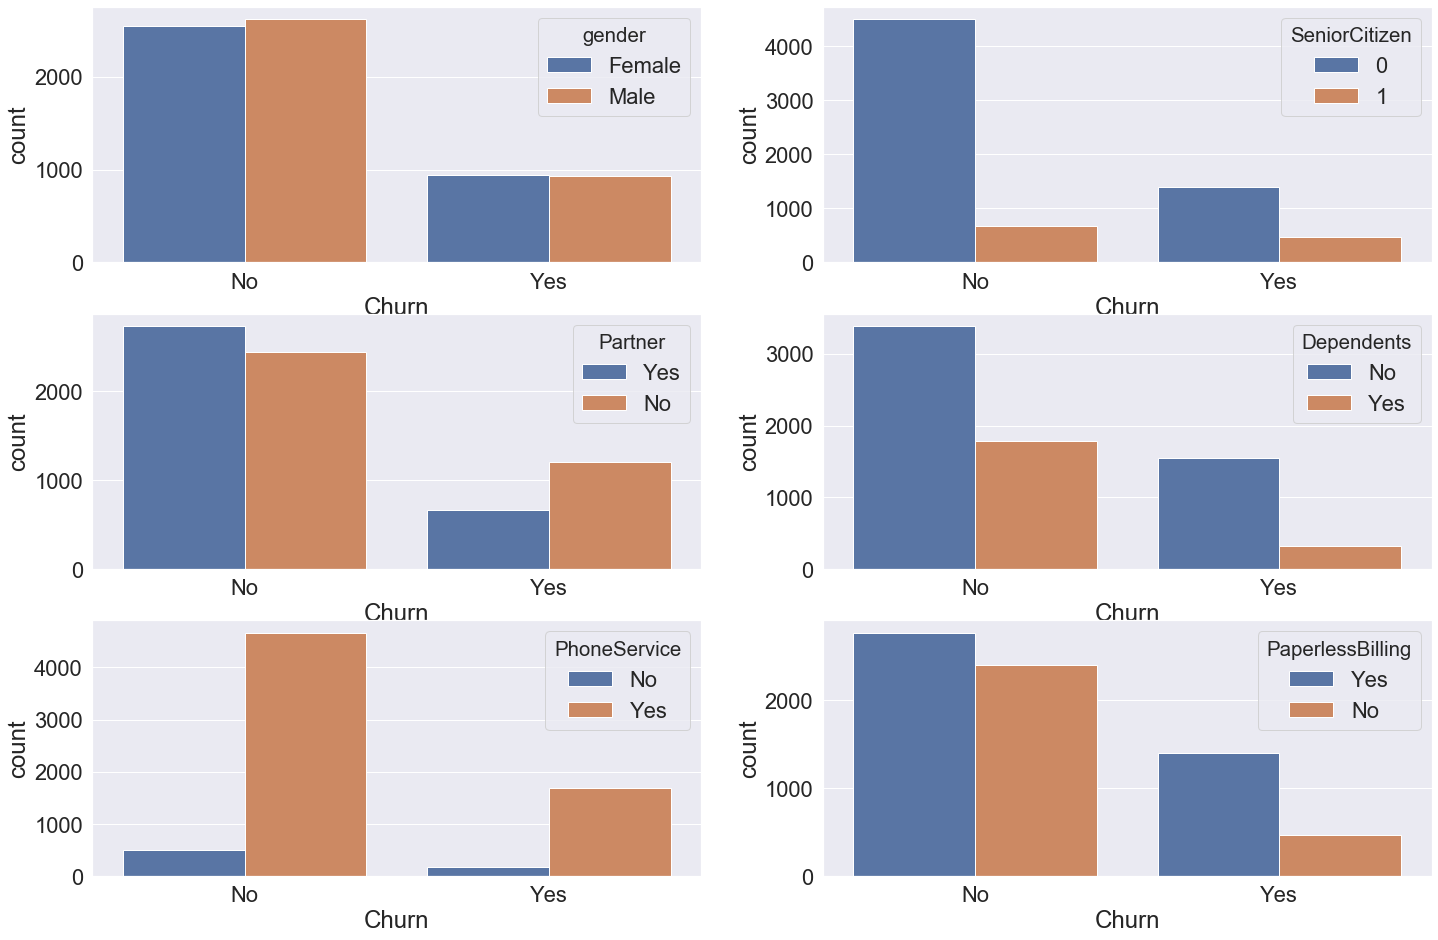

In [16]:
#Analysis of Binary Features :
plt.figure(figsize=(24,16))
sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.countplot(x='Churn',hue='gender',data=df)
plt.subplot(3,2,2)
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)
plt.subplot(3,2,3)
sns.countplot(x='Churn',hue='Partner',data=df)
plt.subplot(3,2,4)
sns.countplot(x='Churn',hue='Dependents',data=df)
plt.subplot(3,2,5)
sns.countplot(x='Churn',hue='PhoneService',data=df)
plt.subplot(3,2,6)
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)
plt.show()

### Conclusion Remarks :

1. The 'Gender' feature plays completely no role in predicting the customer churn.
2. Majority of the senior citizens do not prefer to churn.
3. Married people or people in live-in relationships are more likely not to churn.
4. People having no dependent(children/retired parents) are more likely not to churn.
5. People having landline service alongwith internet services are more likely not to churn.
6. People who prefer Paperless Billing are more likely not to churn.


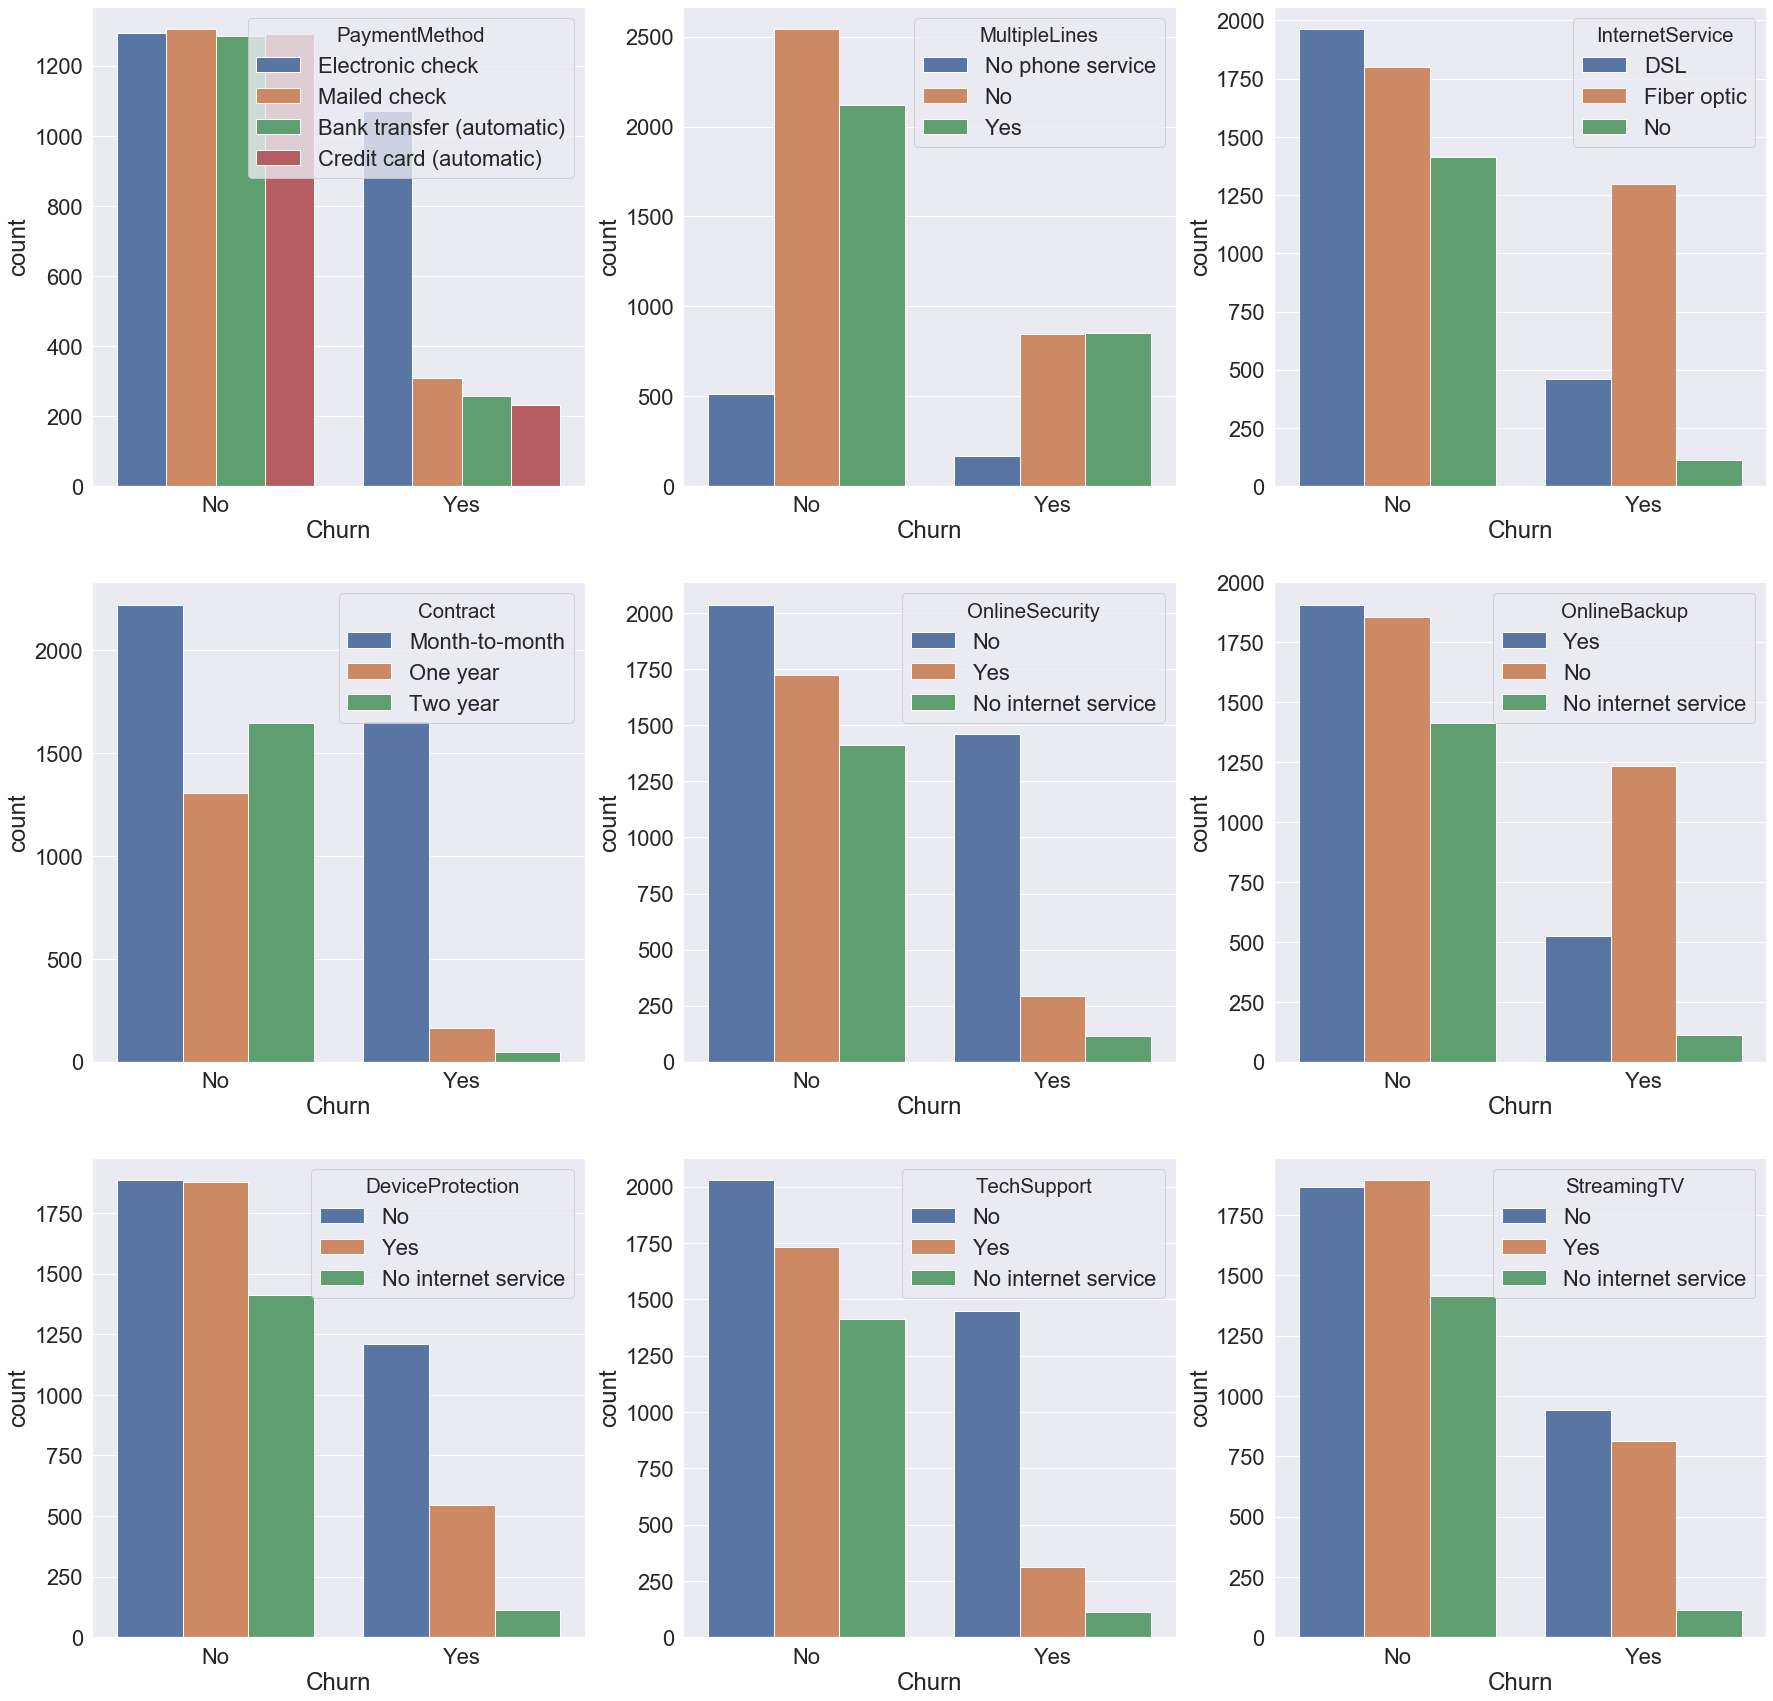

In [17]:
#Analysis of Multiple Class Features :
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
plt.subplot(3,3,1)
sns.countplot(x='Churn',hue='PaymentMethod',data=df)
plt.subplot(3,3,2)
sns.countplot(x='Churn',hue='MultipleLines',data=df)
plt.subplot(3,3,3)
sns.countplot(x='Churn',hue='InternetService',data=df)
plt.subplot(3,3,4)
sns.countplot(x='Churn',hue='Contract',data=df)
plt.subplot(3,3,5)
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)
plt.subplot(3,3,6)
sns.countplot(x='Churn',hue='OnlineBackup',data=df)
plt.subplot(3,3,7)
sns.countplot(x='Churn',hue='DeviceProtection',data=df)
plt.subplot(3,3,8)
sns.countplot(x='Churn',hue='TechSupport',data=df)
plt.subplot(3,3,9)
sns.countplot(x='Churn',hue='StreamingTV',data=df)
plt.show()

### Conclusion Remarks :
1. People who have opted for payment methods other than 'Electronic Check' are most likely not to churn.
2. Multiple lines of connectivity feature does not help much in predicting whether the customer will churn or not.
3. People opting for DSL internet service are more likely not to churn.
4. People having yearly contracts are more likely not to churn.
5. People who have online security are more likely not to churn.
6. People who have online backup are more likely not to churn.
7. People having device protection are more likely not to churn.
8. People having Tech Support are more likely not to churn.
9. People Streaming TV and movies are more likely not to churn.


### Feature Engineering :


#In this section we shall check how the features affect the churn probability and remove the redundant ones :


In [18]:
# Binary Encoding of Target Variable :
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [19]:
# Display of Churn Column :
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [20]:
#Feature dependency on Churn probability:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [21]:
df[['tenure','Churn']].groupby(['Churn']).mean()

,tenure
Churn,
0,37.569965
1,17.979133


In [22]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [23]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [24]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [25]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [26]:
df[['MonthlyCharges','Churn']].groupby(['Churn']).mean()

,MonthlyCharges
Churn,
0,61.265124
1,74.441332


In [27]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [28]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [29]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [30]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [31]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [32]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [33]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [34]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [35]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [36]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [37]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


#### Note: Clearly it can be seen here that features such as 'Gender', 'Phone Service' and 'Multiple Lines' mark out the same probability for both cases of 'Churn' and hence are redundant features in our model to predict the Target Variable and therefore can be removed.
#### *Also 'Customer ID' plays no role to predict the Target Variable and hence it can also be removed.
#### * Also 'Monthly Charges' and 'Total Charges' are linearly co-related hence one of them can also be removed.

In [38]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [39]:
df.drop(['customerID','gender','PhoneService','MultipleLines','TotalCharges'], axis=1, inplace=True)
df.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,Month-to-month,Yes,Electronic check,29.85,0,0,Yes,No,DSL,No,Yes,No,No,No,No
1,34,One year,No,Mailed check,56.95,0,0,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Month-to-month,Yes,Mailed check,53.85,1,0,No,No,DSL,Yes,Yes,No,No,No,No
3,45,One year,No,Bank transfer (automatic),42.30,0,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,2,Month-to-month,Yes,Electronic check,70.70,1,0,No,No,Fiber optic,No,No,No,No,No,No


### Binary Encoding of Binary Features :

In [40]:
#Linear Encoding(Converting the Non-Numeric Attributes into Numeric types):
binary_cols=['Partner','Dependents','PaperlessBilling']

for i in binary_cols:
    df[i]=df[i].replace({"Yes":1,"No":0})

### One-Hot Encoding :

In [41]:
#In this section we shall be converting non-numeric features having more than two classes into dummy variables and give them binary encoding :
dum_cols=['PaymentMethod','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']
for cc in dum_cols:
    dummies = pd.get_dummies(df[cc], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [42]:
df.head()

,tenure,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,1,29.85,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,34,0,56.95,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,1,53.85,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,0,42.30,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
4,2,1,70.70,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


### Matrix Data Analysis :

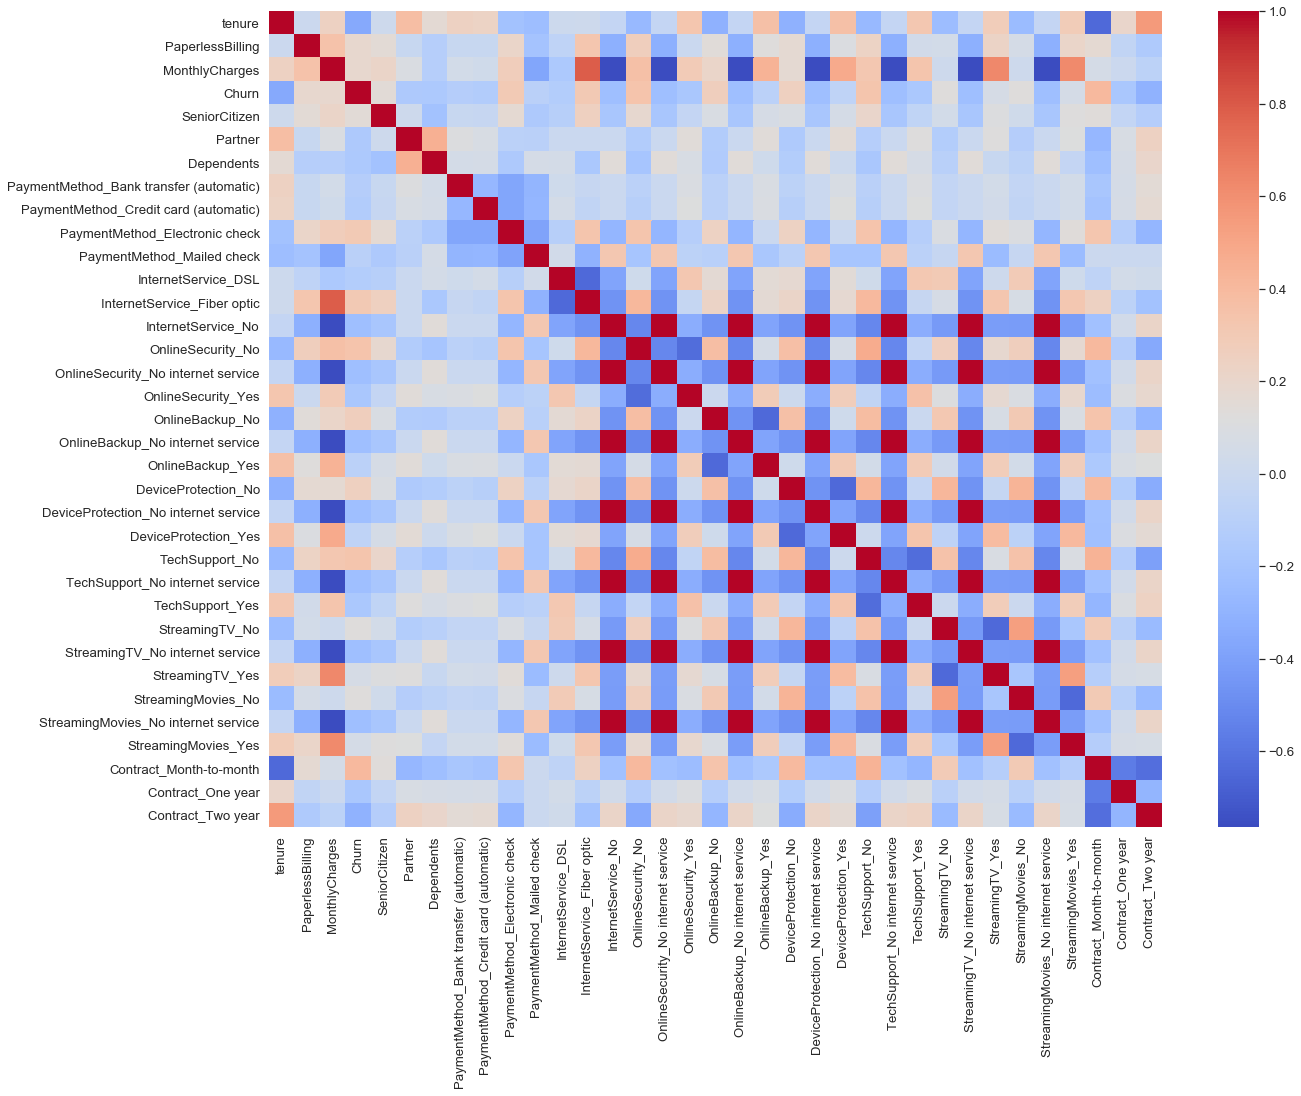

In [43]:
#This matrix depicts the co-relation between different features: 
plt.figure(figsize=(20,15))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

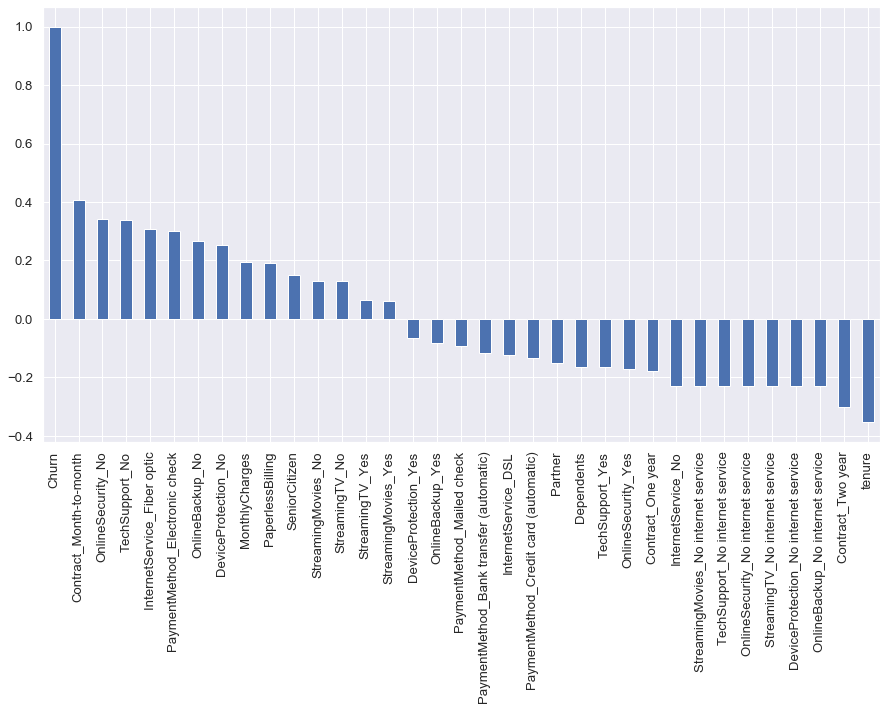

In [44]:
#Graphical analysis of relation of various features with the Target Variable('Churn'):
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### Normalization of Data :

In [45]:
#Creating and Instance of MinMaxScaler class and transforming the data :
norm= MinMaxScaler()
a = norm.fit_transform(df[['tenure']])
b = norm.fit_transform(df[['MonthlyCharges']])
df[['tenure']] = a
df[['MonthlyCharges']] = b

### Resampling of data :

Text(0.5, 1.0, 'Churn Class Distribution Before Resampling')

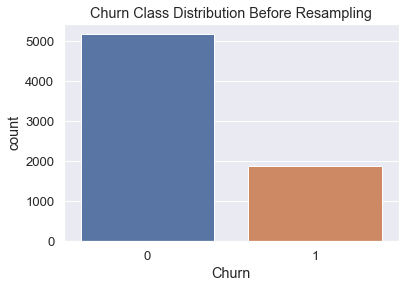

In [46]:
#In this section, resampling of our Target Variable is carried out because our dataset consists of imbalanced class of Target Variable(i.e. 'Churn') which is biased for data modelling :
sns.countplot('Churn', data=df).set_title('Churn Class Distribution Before Resampling')

In [47]:
# Seperating positive class('Yes') and negative class('No') from Target Variable :
df_no = df[df.Churn == 0]
df_yes = df[df.Churn == 1]

In [48]:
# Unsampling the positive class('Yes') :
df_yes_upsampled = df_yes.sample(n=len(df_no), replace=True, random_state=42)
print(len(df_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

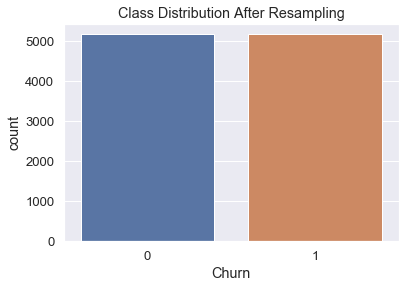

In [49]:
# Combining positive and negative class and checking class distribution:
df_upsampled = df_no.append(df_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=df_upsampled).set_title('Class Distribution After Resampling')

  Note: After Resampling, the Target Variable classes are balanced as seen in the plot above.

## Creating the Model :

In [50]:
# Splitting the dataset into 'Attributes(Independent Variable)' and 'Label(Dependent Variable/Target Variable)' :
x = df_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = df_upsampled['Churn'] #target (dependent variable)

In [51]:
# Splitting the final dataset into 'Training Dataset' and 'Testing Dataset' : 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [52]:
# Training the Model :
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Testing and Accuracy Calculation : 

In [53]:
# Predicting the test set results and calculating the accuracy :
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


### Confusion Matrix : 

In [54]:
# This matrix shall show the correct and incorrect predictions by our model :
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[731 294]
 [214 831]]


##### *Note: In the above calculated matrix, '731' and '831' are 'Correct' predictions whereas '294' and '214' are 'Incorrect' predictions by our model.

Text(0.5, 1, 'Confusion Matrix')

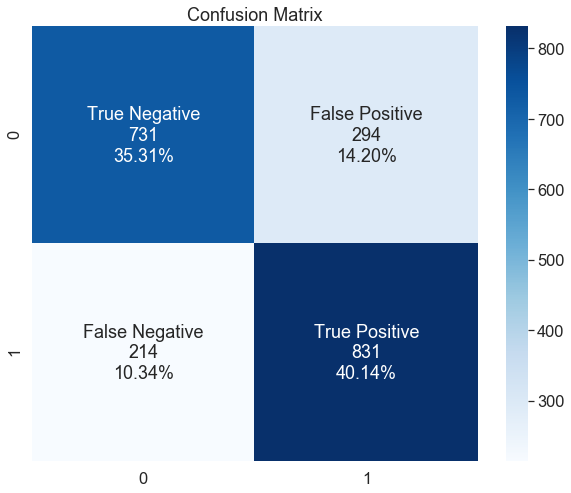

In [55]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues').set_title('Confusion Matrix')

### Compute precision, Recall, F-measure and Support :

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1025
           1       0.74      0.80      0.77      1045

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



### Receiver Operating Characteristic(RAC) Curve :

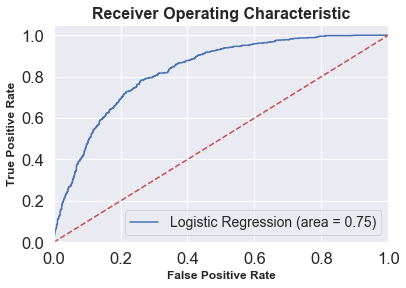

In [57]:
#This characteristic curve shows that how well our model is! i.e. it draws a 'Dotted Line' for a 'Completely Random Classifier' and then a curve for our model.The farther our curve from the dotted line,the better is our model :
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontweight='bold',fontsize='12')
plt.ylabel('True Positive Rate',fontweight='bold',fontsize='12')
plt.title('Receiver Operating Characteristic',fontweight='bold',fontsize='16')
plt.legend(loc="lower right",fontsize='14')
plt.show()

#### Note: And with this we come to an 'END' of building our 'Logistic Regression Model' of 'Binary Classification', but there are certain point to ponder which are as follows :
1. The Accuracy of our model can be further improved using certain algorithms/techniques.
2. Certain other plots may be used to further generate more knowledge over the model. 

<img src="https://media.giphy.com/media/KEG5UtvXUD7WPIhhuy/giphy.gif" width="400" height="200" align="center"/>

---